In [8]:
import deepxde as dde
import numpy as np

In [9]:
def func(x):
    return x * np.sin(5 * x)

geom = dde.geometry.Interval(0, 2)

#now we have set up the function and the interval over which we are using the function.
#next we are setting up the NN 

num_train = 16
num_test = 100
data = dde.data.Function(geom, func, num_train, num_test)

activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN([1] + [20] * 3 + [1], activation, initializer)

Compiling model...
'compile' took 0.000407 s

Training model...

Step      Train loss    Test loss     Test metric   
0         [6.24e-01]    [6.22e-01]    [1.04e+00]    
1000      [1.53e-05]    [1.68e-05]    [5.42e-03]    

Best model at step 1000:
  train loss: 1.53e-05
  test loss: 1.68e-05
  test metric: [5.42e-03]

'train' took 1.551998 s



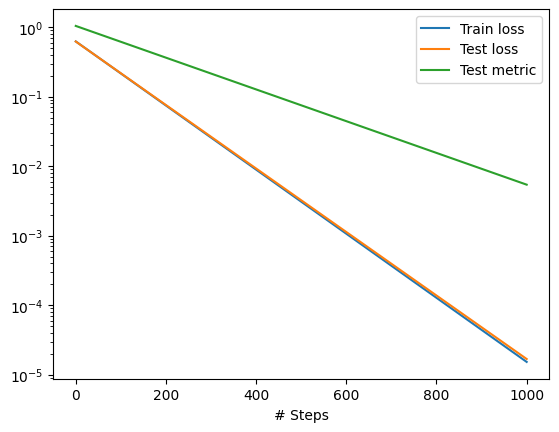

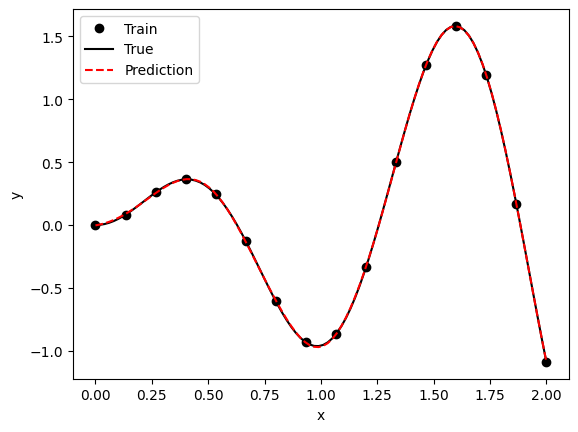

In [10]:
#now that we have setup the NN we can build a model

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])

losshistory, train_state = model.train(iterations=1000)

dde.saveplot(losshistory, train_state, issave=False, isplot=True)

In [11]:
#this is the results i guess
x = geom.uniform_points(5,True)
y_pred = model.predict(x)
print(x[-1])
print(y_pred[-1])
print(func(2))

[2.]
[-1.0869262]
-1.0880422217787395
